In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Data here
df = pd.read_csv('car_data.csv')

df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

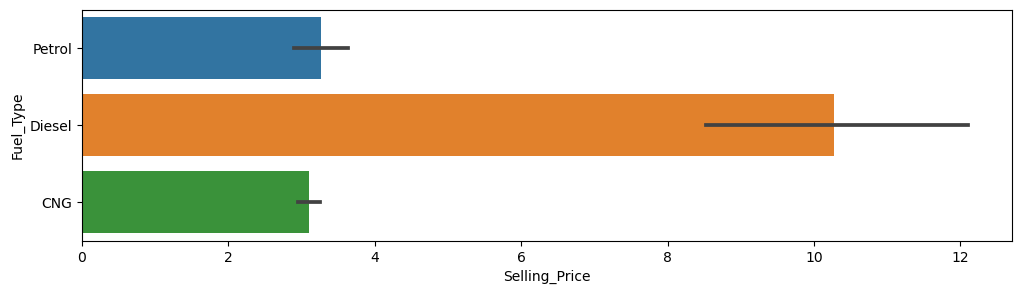

In [8]:
#Explorative data analysis
plt.figure(figsize=(12,3))
sns.barplot(data=df, y='Fuel_Type', x='Selling_Price')
plt.show()

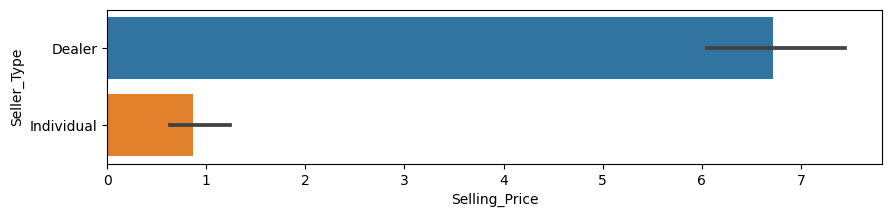

In [9]:
plt.figure(figsize=(10,2))
sns.barplot(data=df, x='Selling_Price', y='Seller_Type')
plt.show()



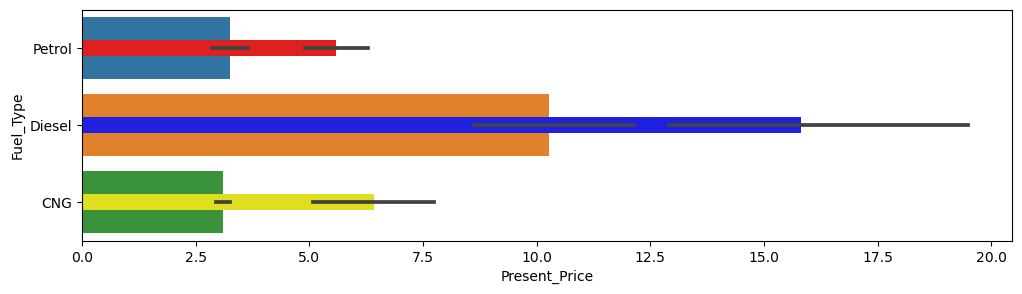

In [10]:
plt.figure(figsize=(12,3))
sns.barplot(data=df, x='Selling_Price', y='Fuel_Type')
sns.barplot(data=df, x='Present_Price',width=0.2, y='Fuel_Type',palette=['Red','Blue','Yellow'])
plt.show()
#It show In each Fuel_type of car it increase the price's of the car From selling price to Present price


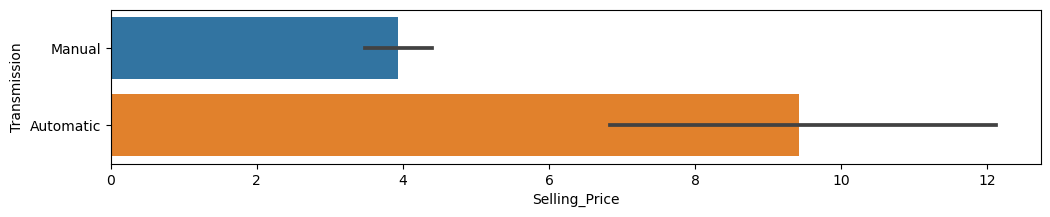

In [11]:
plt.figure(figsize=(12,2))
sns.barplot(data=df, y = 'Transmission', x='Selling_Price')
plt.show()

<Axes: >

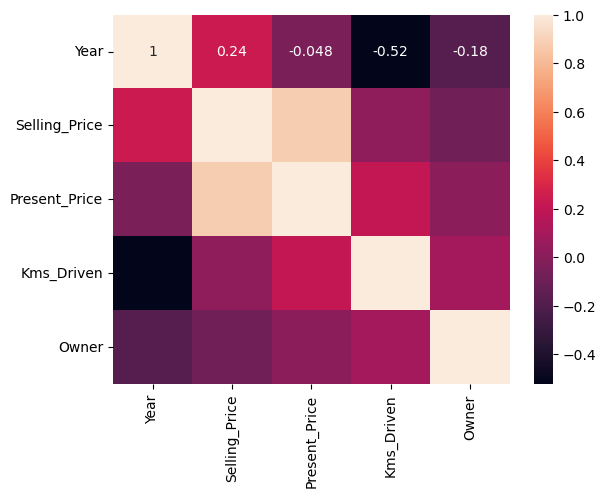

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

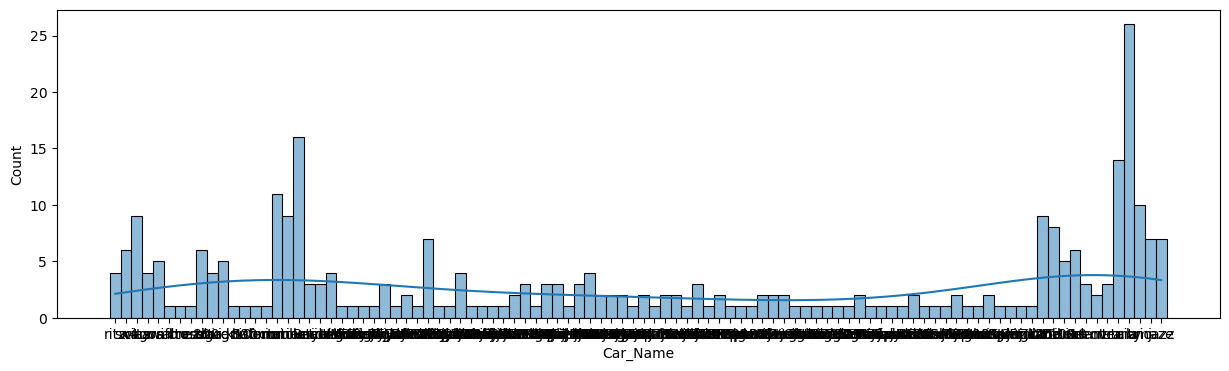

In [13]:
plt.figure(figsize=(15,4))
sns.histplot(data=df, x='Car_Name',hue_order='hue',kde=True)
plt.show()

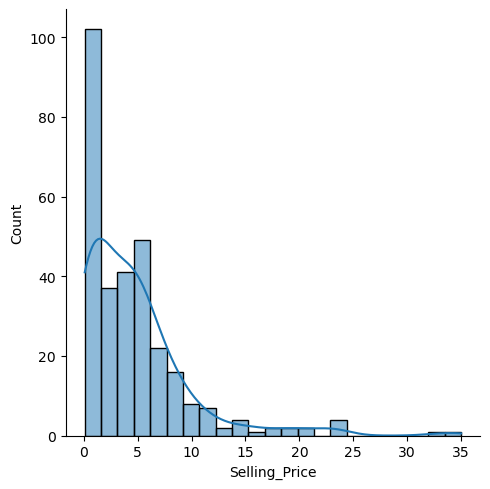

In [14]:
sns.displot(x=df['Selling_Price'],kde=True)

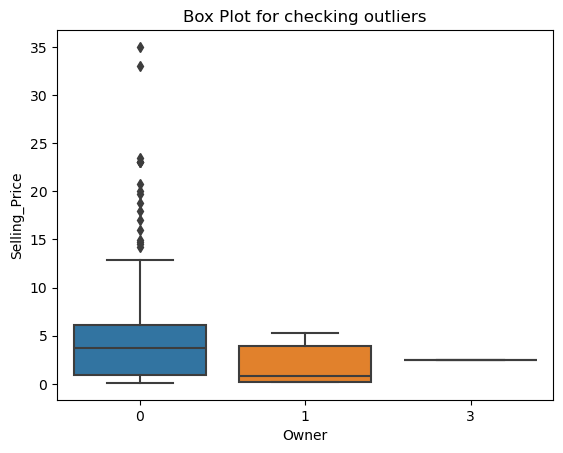

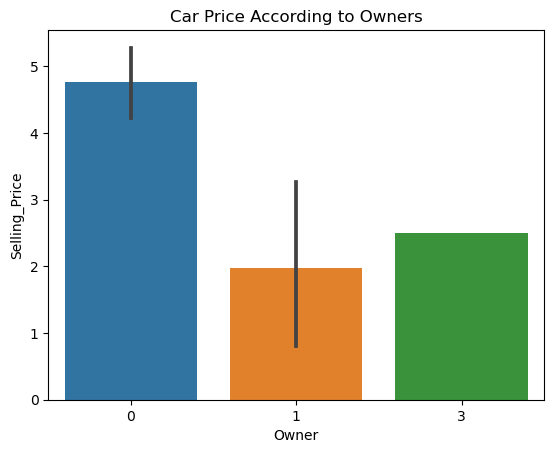

In [15]:
sns.boxplot(df, x='Owner', y='Selling_Price')
plt.title('Box Plot for checking outliers')
plt.show()
sns.barplot(data=df, x = 'Owner', y = 'Selling_Price')
plt.title('Car Price According to Owners')
plt.show()

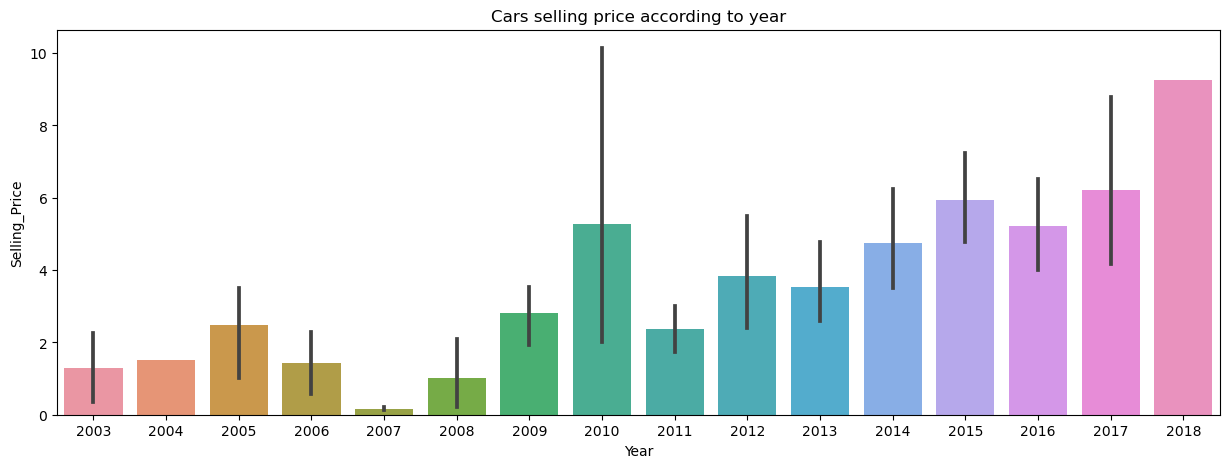

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(df, x='Year', y='Selling_Price')
plt.title('Cars selling price according to year')
plt.show()

<Figure size 1500x500 with 0 Axes>

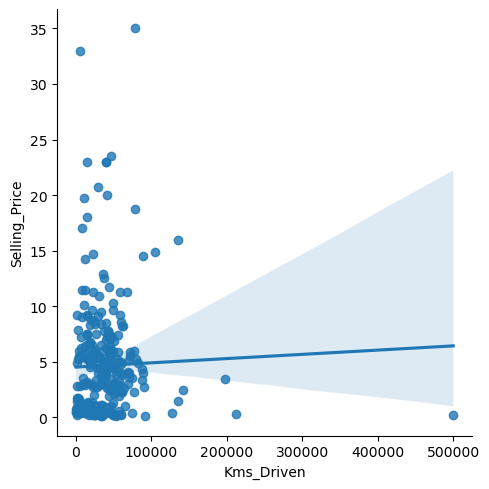

In [17]:
plt.figure(figsize=(15,5))
sns.lmplot(data=df, x = 'Kms_Driven',y='Selling_Price')
plt.show()

In [18]:
#misssing value treatment
df.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [19]:
#transform categorical data
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# Separating the numerical and categorical columns
dataset = df
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical
numerical, categorical = data_type(dataset)
# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols
    
binary_cols = binary_columns(dataset)
# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]
def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset
df = feature_scaling(dataset, numerical)

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,90,0.128897,-0.258416,-0.236215,-0.256224,-0.174501,0,1,0,1
1,93,-0.217514,0.017481,0.221505,0.155911,-0.174501,1,0,0,1
2,68,1.168129,0.510154,0.257427,-0.773969,-0.174501,0,1,0,1
3,96,-0.910335,-0.356950,-0.403079,-0.817758,-0.174501,0,1,0,1
4,92,0.128897,-0.012079,-0.087890,0.141743,-0.174501,1,0,0,1


In [21]:
#  Splitting the data into Train and Test
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']


In [22]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
#Apply Multiple Linear Regression
from sklearn.linear_model import LinearRegression
# Fitting the model here
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Print the model results
print("Multiple Linear Regression:")
print("Intercept:", model_lr.intercept_)
print("Coefficients:", model_lr.coef_)
print("\n")

Multiple Linear Regression:
Intercept: 0.010458956666663324
Coefficients: [ 0.23812194  0.97882378 -0.04107451  0.04242216  0.27554239  0.08326967
 -0.07046299 -0.10796675]




In [25]:
# Feature Importance (Linear)
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': model_lr.coef_})
print("Feature Importance (Multiple Linear Regression):")
print(feature_importance_lr)
print("\n")


Feature Importance (Multiple Linear Regression):
                  Feature  Importance
0                    Year    0.238122
1           Present_Price    0.978824
2              Kms_Driven   -0.041075
3                   Owner    0.042422
4        Fuel_Type_Diesel    0.275542
5        Fuel_Type_Petrol    0.083270
6  Seller_Type_Individual   -0.070463
7     Transmission_Manual   -0.107967




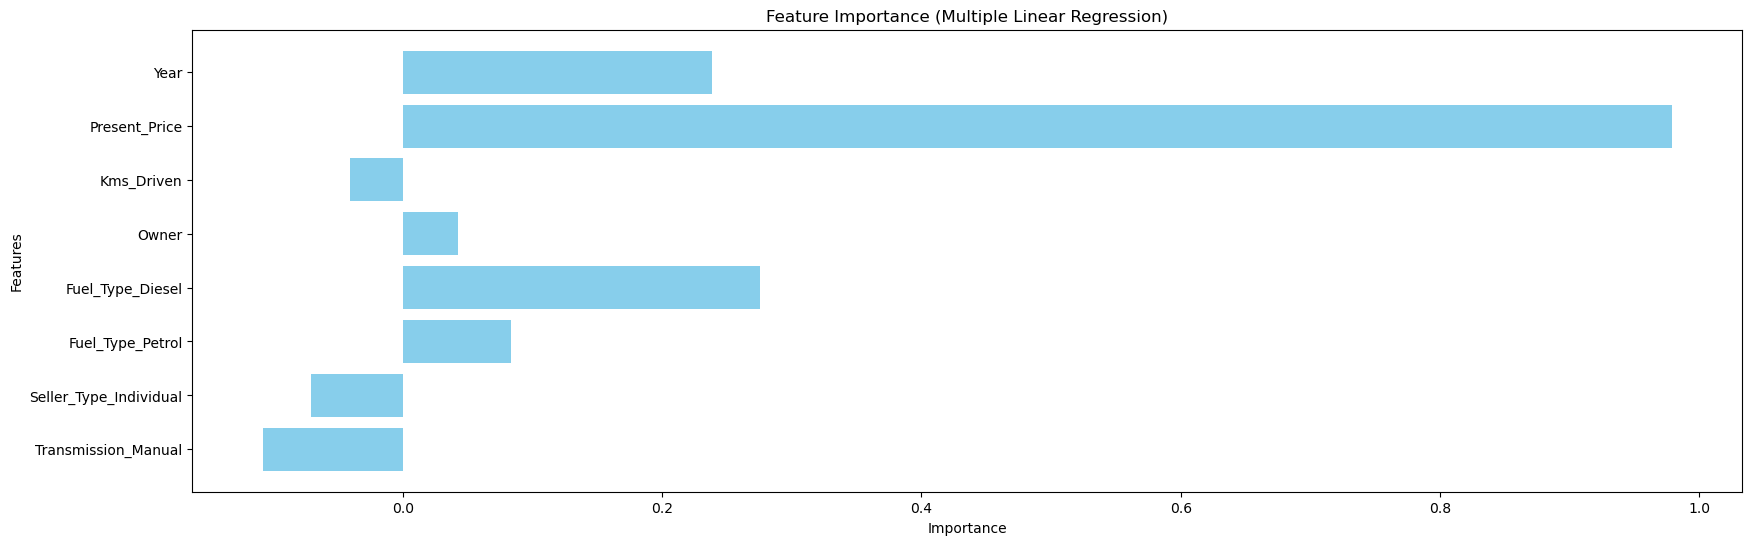

In [26]:
# Get feature importance
plt.figure(figsize=(20, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Multiple Linear Regression)')
plt.gca().invert_yaxis()
plt.show()


In [27]:
# Make predictions
y_pred_lr = model_lr.predict(X_test)
# Calculate metrics
from sklearn.metrics import r2_score, mean_squared_error
sse_lr = np.sum(np.square(y_test - y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Metrics (Multiple Linear Regression):")
print("Sum of Squared Error:", sse_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)


Metrics (Multiple Linear Regression):
Sum of Squared Error: 25.339939758686754
Mean Squared Error: 0.2784608764690852
R-squared: 0.6890048601875023


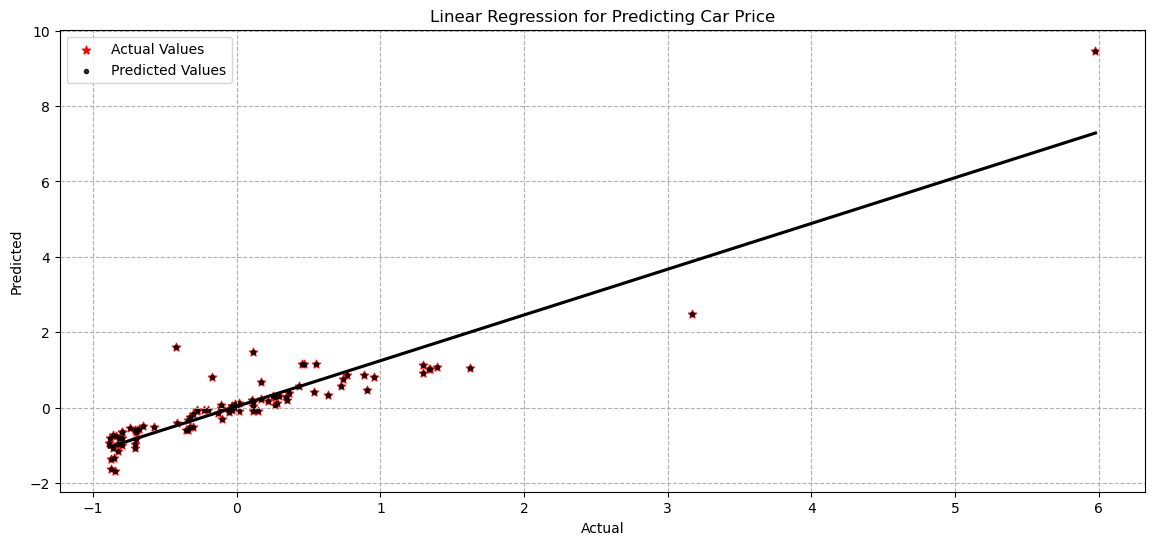

In [28]:
#Visualize the diagnostic plots
plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred_lr,label="Actual Values",color="red",marker="*")
sns.regplot(x=y_test,y=y_pred_lr,ci=None,label="Predicted Values",color="k",marker=".");
plt.legend()
plt.grid(linestyle="dashed")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression for Predicting Car Price")
plt.show()